According to Data Dictionary on National Codes for ethnicity the groups signify the following;
* Group A - White - British
* Group B - White - Irish
* Group C - White - Any other White background
* Group D - Mixed - White and Black Caribbean
* Group E - Mixed - White and Black African
* Group F - Mixed - White and Asian
* Group G - Mixed - Any other mixed background

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
# Loading file
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
# Visualizing top 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Checking missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Brief statistical info
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### About the dataset:

1. 1000 rows and 8 columns.
2. No missing values.
3. 2 dtpes: object and int64.
4. It is a good practice to replace the spaces between the words in the name of each column with an underline.

In [7]:
# Changing space to underline
df = df.rename(columns=lambda x: x.replace(' ', '_'))
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [8]:
# Checking the categorical values
col_categ = list(df.select_dtypes("object").columns)

for categ in col_categ:
    print(df[categ].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


# Data analysis



First, let's take an overview of the data.

## Univariate analysis

### Distribution of categorical variables

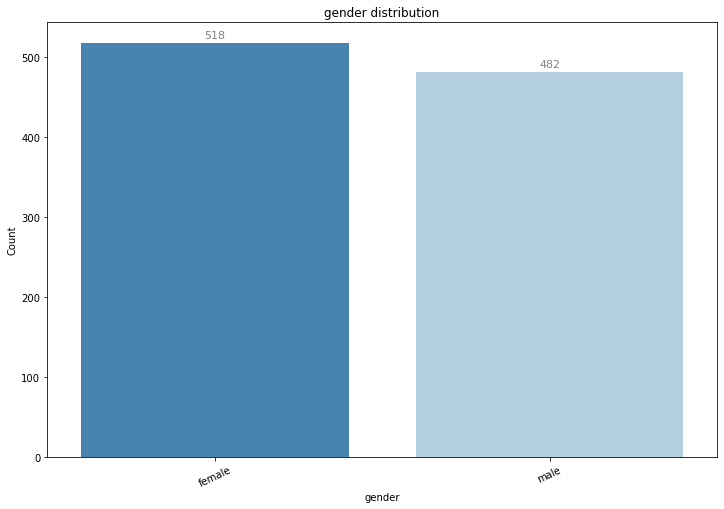

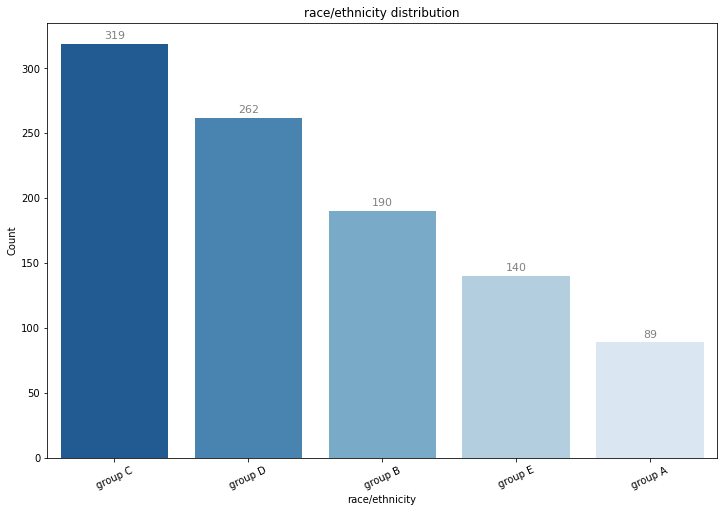

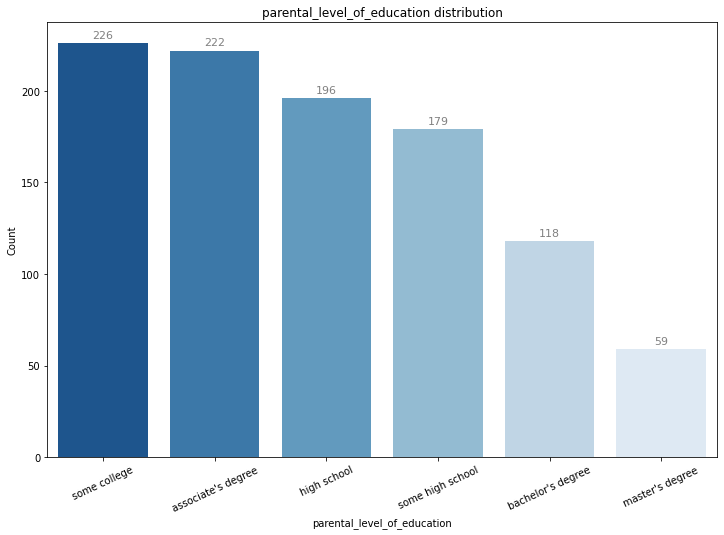

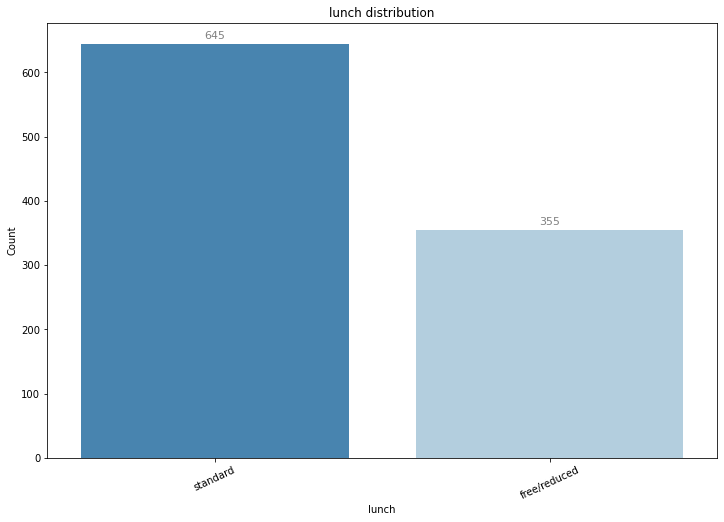

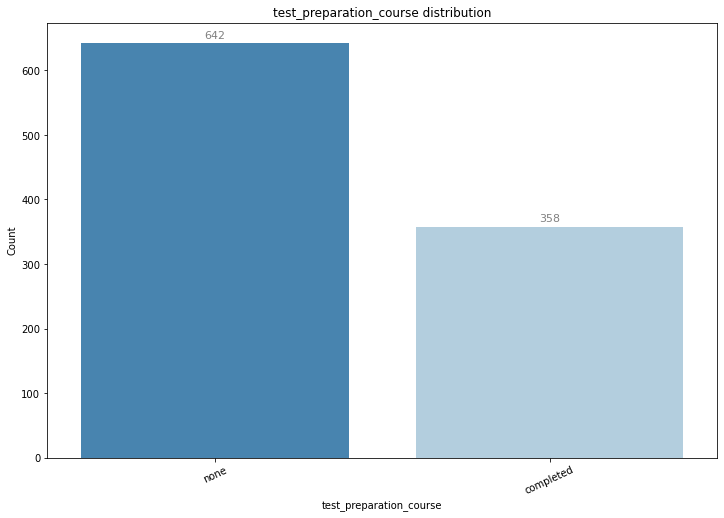

In [18]:
for categ in col_categ:
    categ_counts = df[categ].value_counts().sort_values(ascending=False).index
    
    plt.figure(figsize=(12,8))
    ax = sns.countplot(data=df, x=categ, palette="Blues_r", order=categ_counts)
    plt.xticks(rotation=25)
    ax.set_ylabel("Count")
    ax.set_title(f"{categ} distribution")
    
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', xytext=(0, 8),
                    textcoords='offset points')
    
    plt.show()



### Distribution of numerical variables



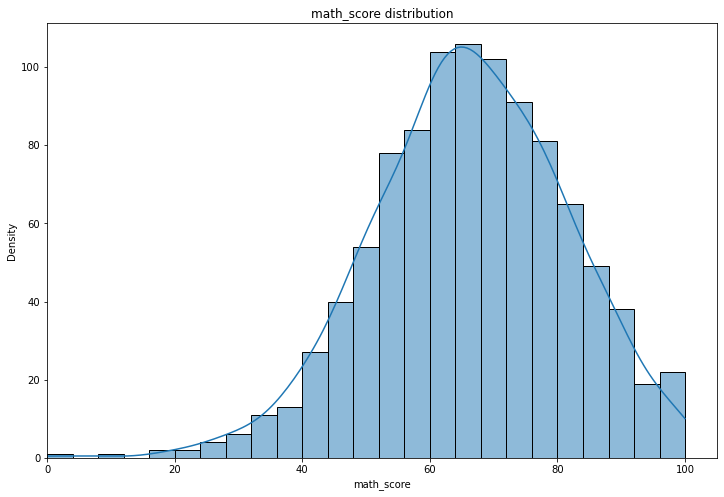

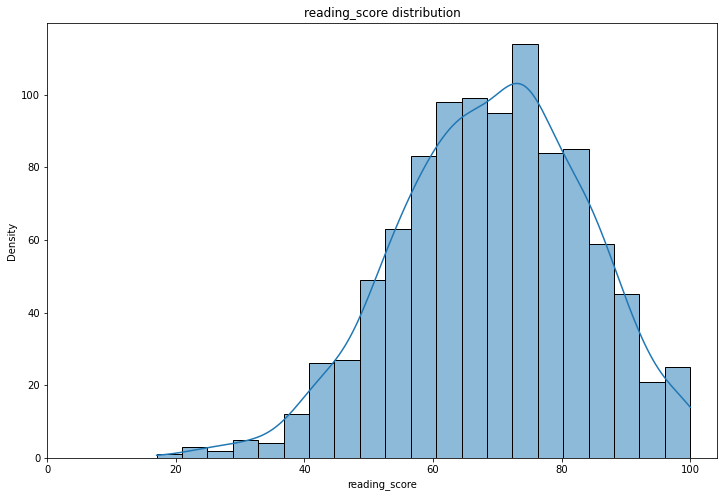

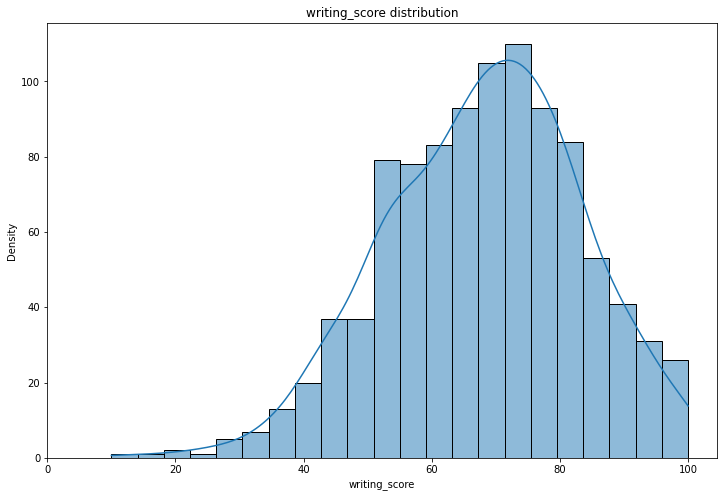

In [20]:
col_num = list(df.select_dtypes("int64").columns)

for num in col_num:
    plt.figure(figsize=(12,8))
    ax = sns.histplot(data=df, x=num, palette="Blues_r", kde=True)
    ax.set_ylabel("Density")
    ax.set_title(f"{num} distribution")
    ax.set_xlim(left=0)
    plt.show()

### Overview

* **Gender**: Our sample contains slightly more females than males.


* **Race/ethnicity**: C > D > B > E > A.


  Group C, that represents 'White - Any other White background', contains many more values than the other groups. Group A (White - British) and E (Mixed - White and Black African), are the minors.


* **Parental level of education**: some college > associate's degree > high school > some high school > bachelor's degree > master's degree.
  
  
  Very few parents have a 'master's degree' or even a 'bachelor's degree', while most parents have 'some college' or 'associate's degree'.


* **Lunch**: More than half of students receive a standard lunch, but concerns that nearly 400 students receive a reduced lunch or none at all. 


* **Test preparation course**: More than 60% of students do not attend a preparatory course.


* **Math score**: Most scores are concentrated between 60 and 80, with an average of 66.


* **Reading score**: Most scores are concentrated between 50 and 80, with an average of 69.


* **Writing score**: Most scores are concentrated between 50 and 80, with an average of 68.

## Bivariate analysis

* What variables may be related to grades?

### Test preparation course & Scores

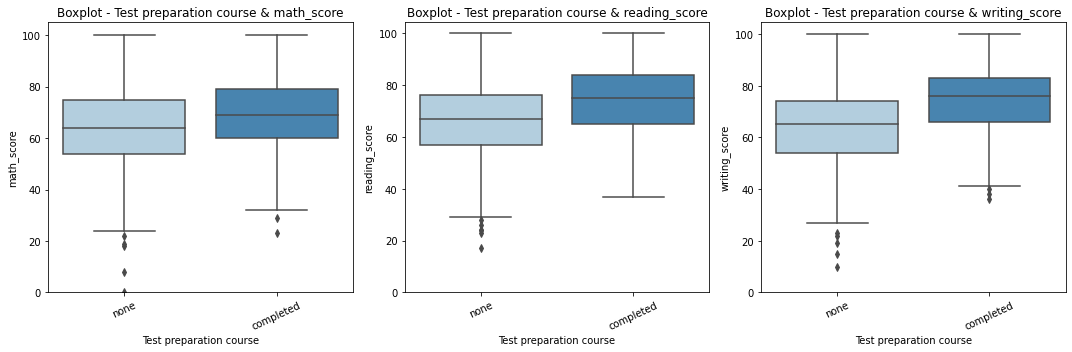

In [21]:
scores = list(df.select_dtypes(include='number'))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

for i, sub in enumerate(scores):
    sns.boxplot(x="test_preparation_course", y=sub, data=df, palette="Blues", ax=axs[i])
    axs[i].set_ylabel(f"{sub}")
    axs[i].set_xlabel("Test preparation course")
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=25)
    axs[i].set_title(f"Boxplot - Test preparation course & {sub}")
    axs[i].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

In all exams, the median score is higher when students have completed the preparation course, especially in Reading and Writing.

### Parental level of education & Scores

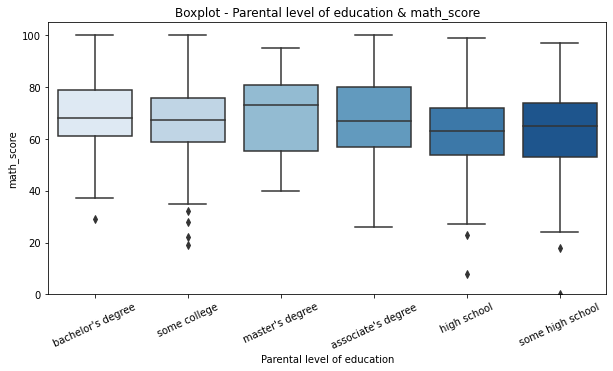

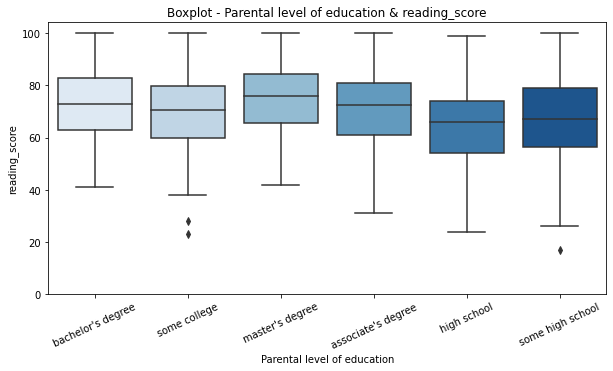

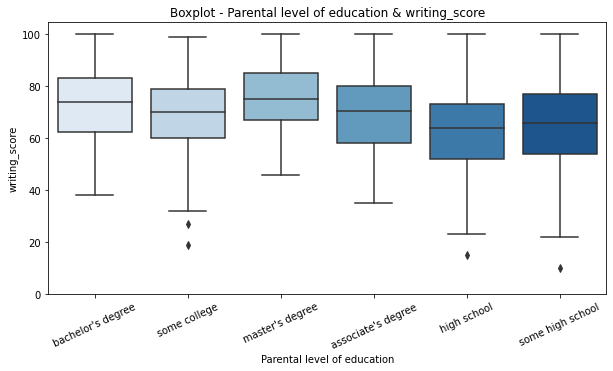

In [23]:
for sub in scores:
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(x="parental_level_of_education", y=sub, data=df, palette="Blues")
    ax.set_ylabel(f"{sub}")
    ax.set_xlabel("Parental level of education")
    plt.xticks(rotation=25)
    ax.set_title(f"Boxplot - Parental level of education & {sub}")
    ax.set_ylim(bottom=0)
    plt.show()

Highest median scores for all exams are when parental level of education is master's degree, lowest for high school. 

### Lunch & Scores

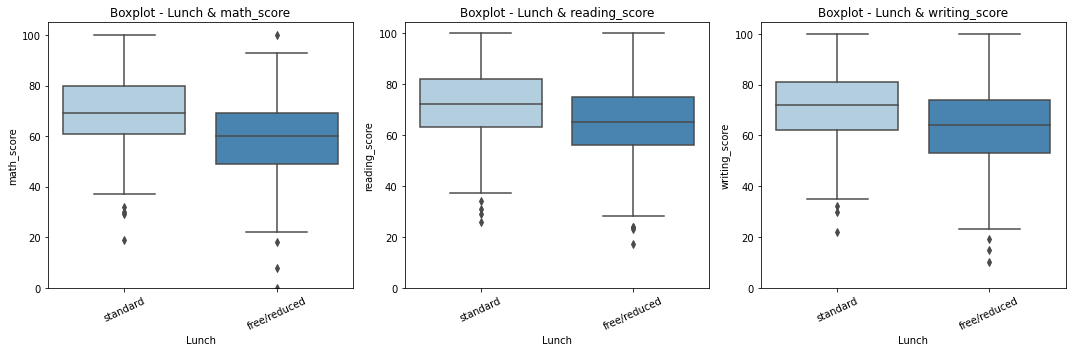

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

for i, sub in enumerate(scores):
    sns.boxplot(x="lunch", y=sub, data=df, palette="Blues", ax=axs[i])
    axs[i].set_ylabel(f"{sub}")
    axs[i].set_xlabel("Lunch")
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=25)
    axs[i].set_title(f"Boxplot - Lunch & {sub}")
    axs[i].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

Students scored higher on all exams when they received standard lunches.

### Race/Ethnicity & Scores

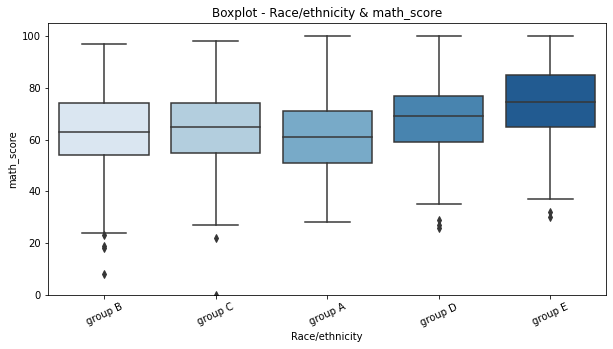

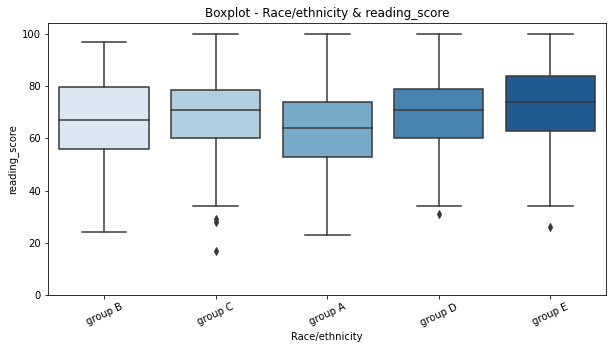

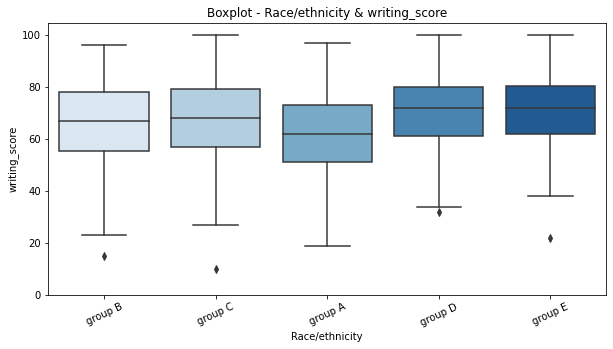

In [25]:
for sub in scores:
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(x="race/ethnicity", y=sub, data=df, palette="Blues")
    ax.set_ylabel(f"{sub}")
    ax.set_xlabel("Race/ethnicity")
    plt.xticks(rotation=25)
    ax.set_title(f"Boxplot - Race/ethnicity & {sub}")
    ax.set_ylim(bottom=0)
    plt.show()

Group E (Mixed - White and Black African) had the best median scores for all exams, while Group A (White - British) had the lowest.

### Gender & Scores

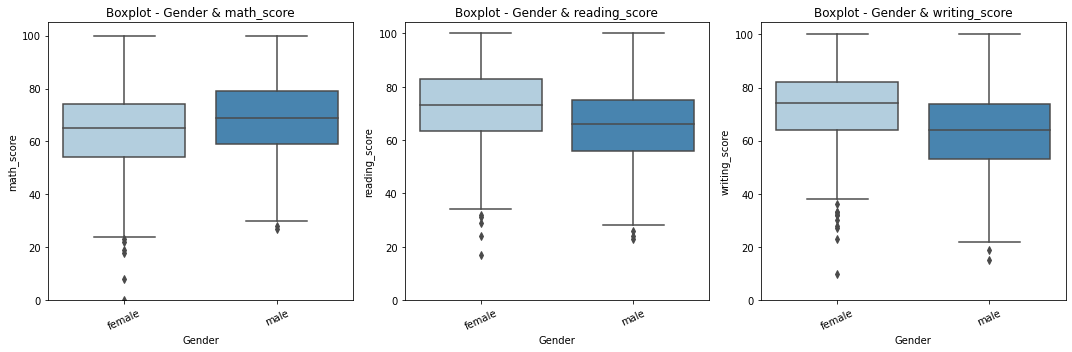

In [26]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

for i, sub in enumerate(scores):
    sns.boxplot(x="gender", y=sub, data=df, palette="Blues", ax=axs[i])
    axs[i].set_ylabel(f"{sub}")
    axs[i].set_xlabel("Gender")
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=25)
    axs[i].set_title(f"Boxplot - Gender & {sub}")
    axs[i].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

While male students had the best median scores in Math, female students had the best median scores in Reading and Writing.

### Correlation between scores

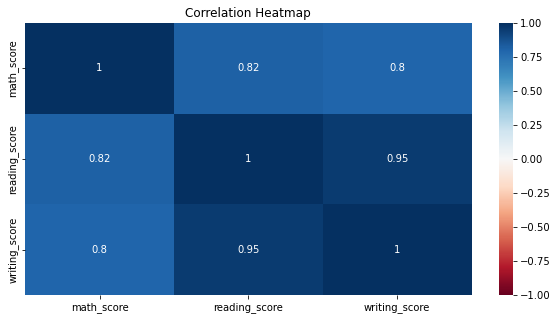

In [17]:
# Plotting the heatmap
plt.figure(figsize = (10, 5))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'RdBu')
plt.show()

Reading and Writing scores have a very high positive correlation, and Math also has a high positive correlation with Reading and Writing.

## Multivariate analysis